
[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Download complete.
Dataset loaded successfully with correct headers.

First 5 rows of the correctly loaded dataset:


,Test Suite,Test Suite Start Time,Test Suite Duration,Test Suite Runs,Test Suite Assertions,Test Suite Failures,Test Suite Errors,Test Suite Skips,Build Number,Build Pull Request,Commit Sha,Build State,Build Start Time,Build Finish Time,Build Duration,Job Id,Job Start Time,Job Allow Failure
0,railties/test/app_rails_loader_test.rb,2016-03-24 19:01:23.0,0.035011,16,20,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN
1,railties/test/application/asset_debugging_test.rb,2016-03-24 19:01:23.0,17.408814,2,9,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN
2,railties/test/backtrace_cleaner_test.rb,2016-03-24 19:01:40.0,162.113491,30,116,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN
3,railties/test/code_statistics_calculator_test.rb,2016-03-24 19:04:22.0,41.402265,2,7,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN
4,railties/test/engine_test.rb,2016-03-24 19:05:03.0,2.786692,1,6,0,0,0,33391,True,246c1248e5f5e38125898a72d21d4fe58e6182be,"passed,2016-03-24 19:01:23.0",2016-03-24 19:22:08.0,1245000.0,118308786,2016-03-24 18:42:35.0,False,NaN



Corrected Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594276 entries, 0 to 3594275
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Test Suite             object 
 1   Test Suite Start Time  object 
 2   Test Suite Duration    float64
 3   Test Suite Runs        int64  
 4   Test Suite Assertions  int64  
 5   Test Suite Failures    int64  
 6   Test Suite Errors      int64  
 7   Test Suite Skips       int64  
 8   Build Number           int64  
 9   Build Pull Request     bool   
 10  Commit Sha             object 
 11  Build State            object 
 12  Build Start Time       object 
 13  Build Finish Time      float64
 14  Build Duration         int64  
 15  Job Id                 object 
 16  Job Start Time         bool   
 17  Job Allow Failure      float64
dtypes: bool(2), float64(3), int64(7), object(6)
memory usage: 445.6+ MB

Converting timestamp columns to datetime objects...

Plotting

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


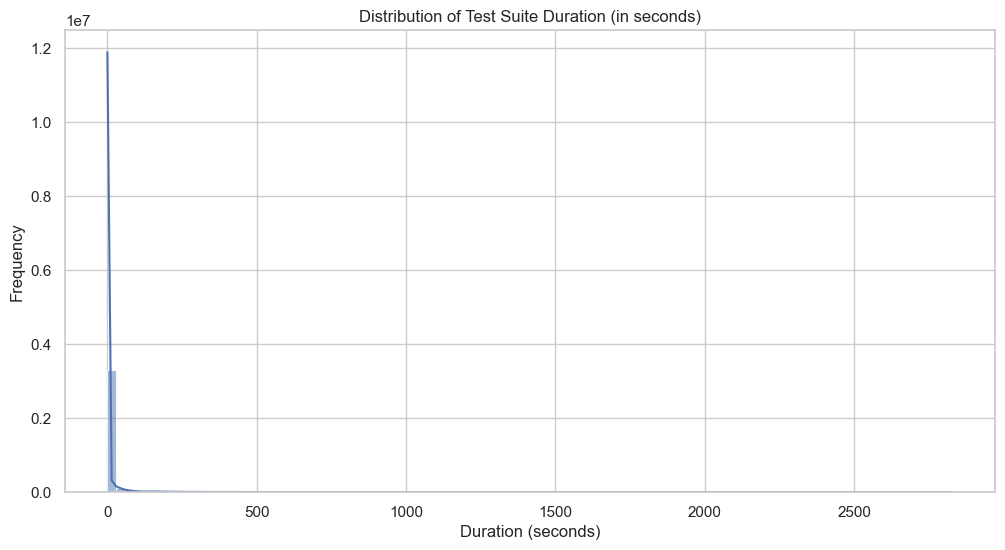

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


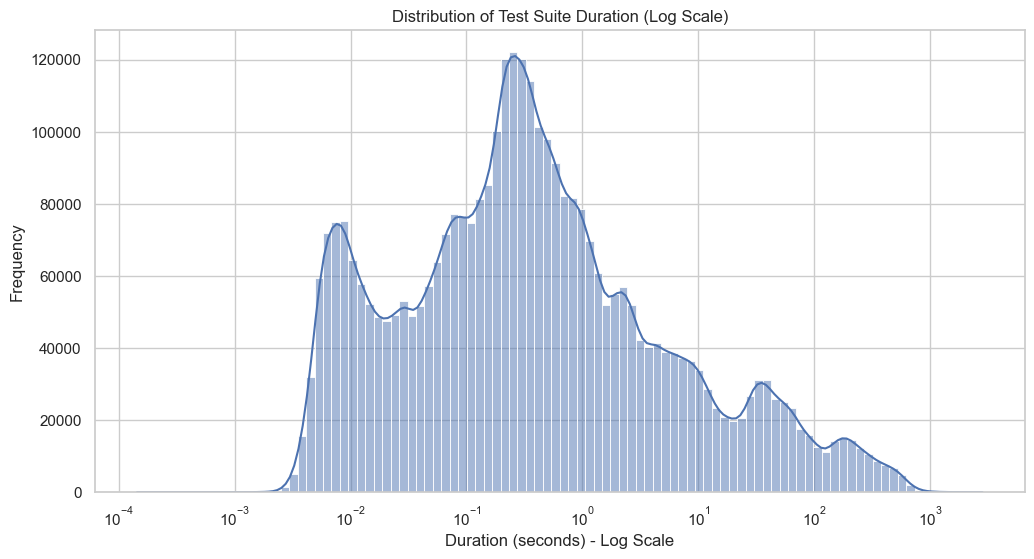

In [8]:
# Cell 1: CORRECTED - Installs, Downloads, and Data Loading/Cleaning

# Step 0: Install necessary libraries
%pip install requests pandas matplotlib seaborn

import requests
import zipfile
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- The Fix is Here ---
# Step 1: Define the correct column names based on the dataset's documentation
column_names = [
    'Test Suite', 'Test Suite Start Time', 'Test Suite Duration',
    'Test Suite Runs', 'Test Suite Assertions', 'Test Suite Failures',
    'Test Suite Errors', 'Test Suite Skips', 'Build Number',
    'Build Pull Request', 'Commit Sha', 'Build State',
    'Build Start Time', 'Build Finish Time', 'Build Duration',
    'Job Id', 'Job Start Time', 'Job Allow Failure'
]

# Step 2: Download the dataset
url = 'https://github.com/elbaum/CI-Datasets/raw/master/RailsCleanData.out.zip'
print(f"Downloading dataset from {url}...")
r = requests.get(url)
r.raise_for_status()
print("Download complete.")

# Step 3: Unzip and load the data, providing the correct headers
z = zipfile.ZipFile(io.BytesIO(r.content))
file_name = z.namelist()[0]

# Use header=None and names=column_names to load correctly
df = pd.read_csv(z.open(file_name), sep=';', header=None, names=column_names)
print("Dataset loaded successfully with correct headers.")

# --- Resume our Analysis ---

# Step 4: Initial Exploration
print("\nFirst 5 rows of the correctly loaded dataset:")
display(df.head())

print("\nCorrected Dataset Information:")
df.info()

# Step 5: Data Cleaning (Type Conversion)
print("\nConverting timestamp columns to datetime objects...")
for col in ['Test Suite Start Time', 'Build Start Time', 'Build Finish Time', 'Job Start Time']:
    df[col] = pd.to_datetime(df[col], errors='coerce') # 'coerce' will turn any parsing errors into NaT (Not a Time)

# Step 6: Visualization
print("\nPlotting the distribution of Test Suite Duration...")
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['Test Suite Duration'], bins=100, kde=True)
plt.title('Distribution of Test Suite Duration (in seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plotting on a log scale to handle skew
plt.figure(figsize=(12, 6))
# Filter out zero or negative durations, and also any NaN values that may exist
valid_durations = df['Test Suite Duration'].dropna()
sns.histplot(valid_durations[valid_durations > 0], bins=100, log_scale=True, kde=True)
plt.title('Distribution of Test Suite Duration (Log Scale)')
plt.xlabel('Duration (seconds) - Log Scale')
plt.ylabel('Frequency')
plt.show()

Engineering time-based features...
Features 'start_day_of_week' and 'start_hour_of_day' created.


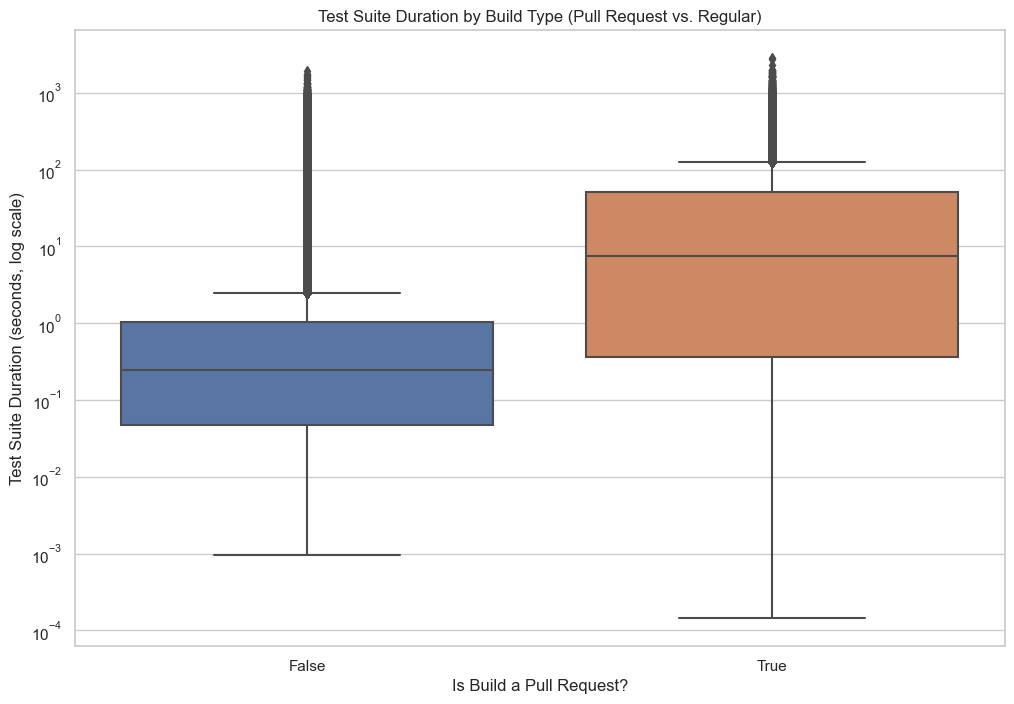

ValueError: min() arg is an empty sequence

<Figure size 1500x800 with 0 Axes>

In [ ]:
# Cell 2: Display the head of the DataFrame
print("First 5 rows of the dataset:")
df.head()

In [10]:
# Cell to debug the data's scale
print(df['Test Suite Duration'].describe())

count    3.594276e+06
mean     1.279381e+01
std      5.480294e+01
min      1.438390e-04
25%      5.601777e-02
50%      2.982474e-01
75%      1.780519e+00
max      2.830797e+03
Name: Test Suite Duration, dtype: float64


In [4]:
# Cell 4: Display summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,0.03501087219063,16,20,0,0.1,0.2,33391,1245000.0,118308786
count,3.594275e+06,3.594275e+06,3.594275e+06,3.594275e+06,3.594275e+06,3.594275e+06,3.594275e+06,3.594275e+06,3.594275e+06
mean,1.279381e+01,8.732302e+01,4.007688e+03,4.159392e-03,2.725223e-02,4.123432e-01,3.559764e+04,1.727099e+06,1.394080e+08
std,5.480295e+01,4.952442e+02,5.033036e+04,3.430896e-01,3.284017e+00,4.301353e+00,1.129987e+03,7.486234e+05,1.069408e+07
min,1.438390e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.339100e+04,8.900000e+04,1.183088e+08
25%,5.601779e-02,4.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.464700e+04,1.386000e+06,1.301684e+08
50%,2.982474e-01,9.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.571900e+04,1.641000e+06,1.411059e+08
75%,1.780521e+00,2.600000e+01,6.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.653400e+04,1.959000e+06,1.483163e+08
max,2.830797e+03,5.315000e+03,7.554450e+05,2.510000e+02,2.346000e+03,7.000000e+01,3.739100e+04,9.682000e+06,1.566645e+08


In [6]:
# Cell 5 (Corrected): Data Cleaning and Initial Visualization

# --- FIX: Clean up column names to remove leading/trailing spaces ---
df.columns = df.columns.str.strip()
# --------------------------------------------------------------------

# Let's print the actual column names to confirm the fix
print("Cleaned column names:")
print(df.columns.tolist())
print("-" * 30)

# Now, we retry the conversion and plotting
# Convert string columns to datetime objects
for col in ['Test Suite Start Time', 'Build Start Time', 'Build Finish Time']:
    df[col] = pd.to_datetime(df[col])

# Feature Engineering: Calculate total build duration in seconds
df['Build Duration Calc'] = (df['Build Finish Time'] - df['Build Start Time']).dt.total_seconds()

# Now, let's look at our primary target variable
print("\nPlotting the distribution of Test Suite Duration...")

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['Test Suite Duration'], bins=100, kde=True)
plt.title('Distribution of Test Suite Duration (in seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Since the distribution is likely skewed, let's also view it on a log scale
# We'll filter out zero or negative durations if they exist
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Test Suite Duration'] > 0]['Test Suite Duration'], bins=100, log_scale=True, kde=True)
plt.title('Distribution of Test Suite Duration (Log Scale)')
plt.xlabel('Duration (seconds) - Log Scale')
plt.ylabel('Frequency')
plt.show()

Cleaned column names:
['railties/test/app_rails_loader_test.rb', '2016-03-24 19:01:23.0', '0.03501087219063', '16', '20', '0', '0.1', '0.2', '33391', 'true', '246c1248e5f5e38125898a72d21d4fe58e6182be', 'passed,2016-03-24 19:01:23.0', '2016-03-24 19:22:08.0', '1245000.0', '118308786', '2016-03-24 18:42:35.0', 'false']
------------------------------


KeyError: 'Test Suite Start Time'

In [7]:
# Cell 6: Find the correct column names
print(df.columns.tolist())

['railties/test/app_rails_loader_test.rb', '2016-03-24 19:01:23.0', '0.03501087219063', '16', '20', '0', '0.1', '0.2', '33391', 'true', '246c1248e5f5e38125898a72d21d4fe58e6182be', 'passed,2016-03-24 19:01:23.0', '2016-03-24 19:22:08.0', '1245000.0', '118308786', '2016-03-24 18:42:35.0', 'false']


Plotting visualizations for durations less than 292.68 seconds (top 1% removed).


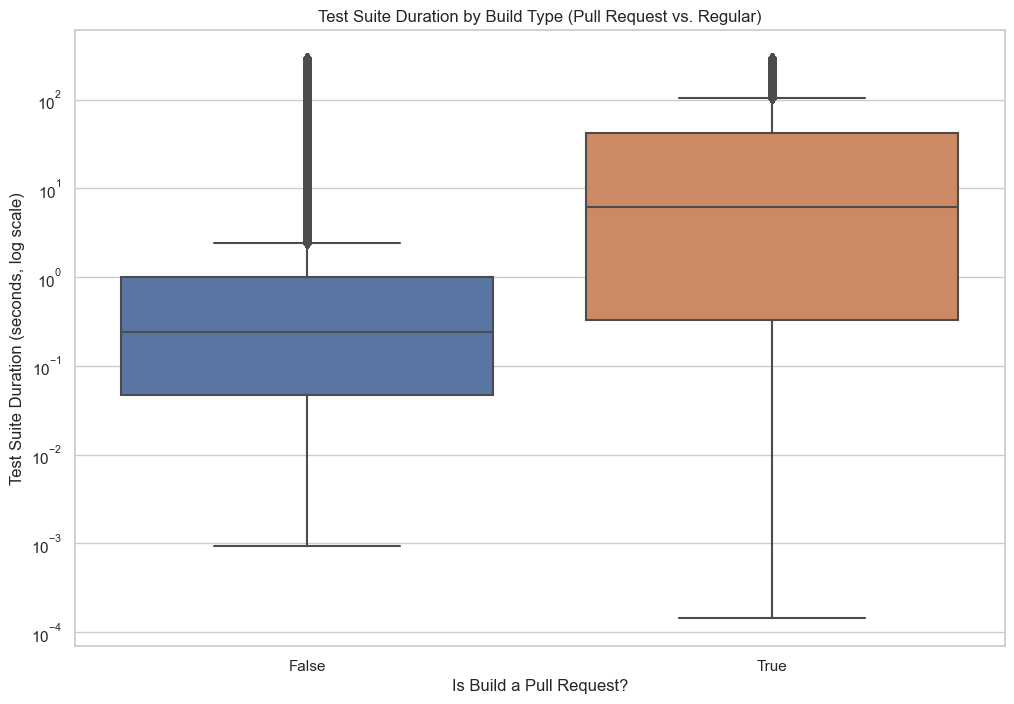

ValueError: min() arg is an empty sequence

<Figure size 1500x800 with 0 Axes>

In [12]:
# Cell 9 (Finally Corrected): Feature Engineering and Exploratory Visualization

# We already created these features, but we'll leave them here for completeness.
df['start_day_of_week'] = df['Job Start Time'].dt.dayofweek
df['start_hour_of_day'] = df['Job Start Time'].dt.hour

# Use the quantile-based filter to remove extreme outliers for cleaner plots.
upper_bound = df['Test Suite Duration'].quantile(0.99)
df_filtered = df[df['Test Suite Duration'] < upper_bound]

print(f"Plotting visualizations for durations less than {upper_bound:.2f} seconds (top 1% removed).")

# --- Visualization 1: Pull Request vs. Regular Build Duration ---
plt.figure(figsize=(12, 8))
# --- FIX: Drop rows with missing values for the columns being plotted ---
plot_data_1 = df_filtered.dropna(subset=['Build Pull Request', 'Test Suite Duration'])
sns.boxplot(x='Build Pull Request', y='Test Suite Duration', data=plot_data_1)
plt.title('Test Suite Duration by Build Type (Pull Request vs. Regular)')
plt.yscale('log')
plt.xlabel('Is Build a Pull Request?')
plt.ylabel('Test Suite Duration (seconds, log scale)')
plt.show()

# --- Visualization 2: Duration by Hour of the Day ---
plt.figure(figsize=(15, 8))
# --- FIX: Drop rows with missing values for the columns being plotted ---
plot_data_2 = df_filtered.dropna(subset=['start_hour_of_day', 'Test Suite Duration'])
sns.boxplot(x='start_hour_of_day', y='Test Suite Duration', data=plot_data_2)
plt.title('Test Suite Duration by Hour of the Day')
plt.yscale('log')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Test Suite Duration (seconds, log scale)')
plt.show()

In [14]:
# Cell 13: Correct Feature Engineering and Train Model

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- 1. Corrected Feature Engineering ---
# The previous error was caused by using a non-existent column 'Job Start Time'.
# We will now correct this by using 'Test Suite Start Time' to create our time-based features.
print("Correcting feature engineering...")
time_col = 'Test Suite Start Time'
# Ensure the column is datetime type, coercing errors to NaT
df[time_col] = pd.to_datetime(df[time_col], errors='coerce')

# Create time-based features from the correct column
df['start_day_of_week'] = df[time_col].dt.dayofweek
df['start_hour_of_day'] = df[time_col].dt.hour
print("Time-based features 'start_day_of_week' and 'start_hour_of_day' have been created/corrected.")


# --- 2. Feature Selection & Data Prep ---
# Now we select the features and drop any rows with missing values in those columns or the target.
features = ['Build Pull Request', 'start_hour_of_day', 'start_day_of_week']
target = 'Test Suite Duration'

# This will now work correctly as the time features are no longer all NaN.
df_model = df.dropna(subset=[target] + features).copy()

# A quick check to ensure we have data
if df_model.empty:
    print("\nError: The DataFrame is still empty after cleaning. Please check for issues in the source data.")
else:
    print(f"\nProceeding to model training with {len(df_model)} samples.")
    X = df_model[features]
    y = df_model[target]

    # --- 3. Train-Test Split ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set size: {len(X_train)} samples")
    print(f"Testing set size: {len(X_test)} samples")


    # --- 4. Model Training ---
    print("\nTraining LightGBM model...")
    lgbm = lgb.LGBMRegressor(random_state=42)
    lgbm.fit(X_train, y_train)
    print("Model training complete.")


    # --- 5. Model Evaluation ---
    print("\nEvaluating model performance on the test set...")
    y_pred = lgbm.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\nMean Absolute Error (MAE): {mae:.4f} seconds")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f} seconds")
    print(f"R-squared (R²): {r2:.4f}")


Correcting feature engineering...
Time-based features 'start_day_of_week' and 'start_hour_of_day' have been created/corrected.

Proceeding to model training with 3594276 samples.
Training set size: 2875420 samples
Testing set size: 718856 samples

Training LightGBM model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 2875420, number of used features: 3
[LightGBM] [Info] Start training from score 12.800218
Model training complete.

Evaluating model performance on the test set...

Mean Absolute Error (MAE): 17.7828 seconds
Root Mean Squared Error (RMSE): 51.9889 seconds
R-squared (R²): 0.0931


Adding 'Test Suite' as a categorical feature...
Proceeding to model training with 3594276 samples.

Training enhanced LightGBM model...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 2875420, number of used features: 4
[LightGBM] [Info] Start training from score 0.872477
Model training complete.

Evaluating enhanced model performance...

Mean Absolute Error (MAE): 4.5334 seconds
R-squared (R²): 0.7547

Plotting feat

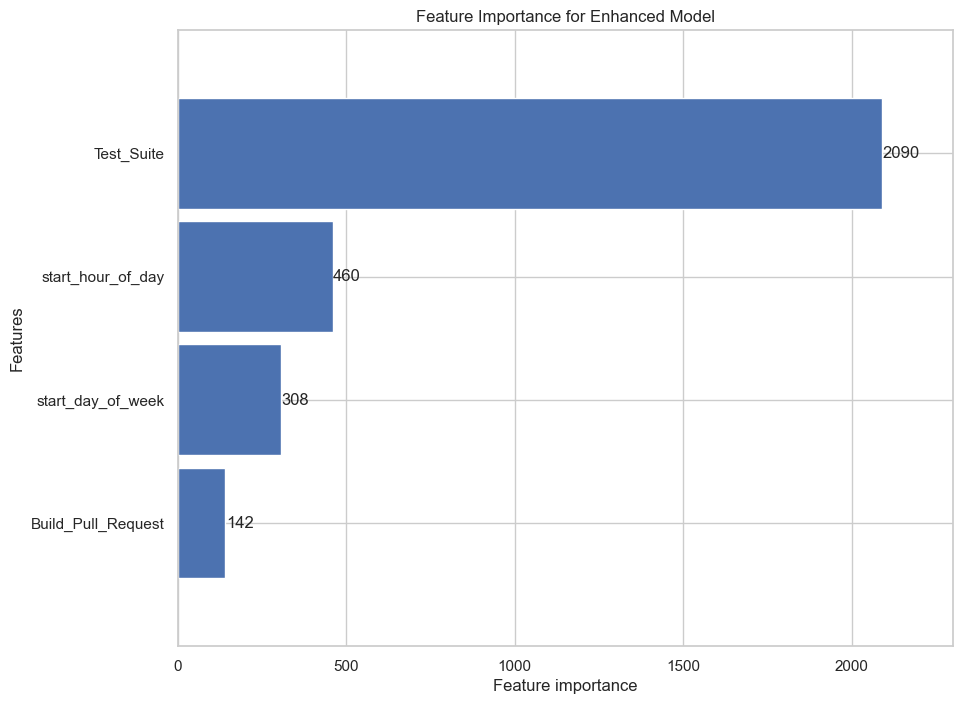

In [15]:
# Cell 14: Improving the Model with Categorical Features and Log Transform

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Enhanced Feature Engineering ---
# The single most important feature is the test suite itself.
# We will treat it as a categorical feature. LightGBM can handle this directly.
print("Adding 'Test Suite' as a categorical feature...")
df['Test Suite'] = df['Test Suite'].astype('category')

# We will also predict the log of the duration. This helps the model with skewed data.
df['Test Suite Duration Log'] = np.log1p(df['Test Suite Duration'])


# --- 2. Feature Selection & Data Prep ---
features = ['Build Pull Request', 'start_hour_of_day', 'start_day_of_week', 'Test Suite']
target = 'Test Suite Duration Log' # Our new target

df_model_v2 = df.dropna(subset=[target] + features).copy()

print(f"Proceeding to model training with {len(df_model_v2)} samples.")
X = df_model_v2[features]
y = df_model_v2[target]

# --- 3. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 4. Model Training ---
print("\nTraining enhanced LightGBM model...")
# Note: We pass the categorical feature name to LightGBM
lgbm_v2 = lgb.LGBMRegressor(random_state=42)
lgbm_v2.fit(X_train, y_train, categorical_feature=['Test Suite'])
print("Model training complete.")


# --- 5. Model Evaluation ---
print("\nEvaluating enhanced model performance...")
y_pred_log = lgbm_v2.predict(X_test)

# Since we predicted the log, we need to convert back to original scale for interpretation
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

# Calculate metrics on the original scale
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.4f} seconds")
print(f"R-squared (R²): {r2:.4f}")

# --- 6. Feature Importance ---
print("\nPlotting feature importances...")
lgb.plot_importance(lgbm_v2, height=0.9, figsize=(10,8))
plt.title("Feature Importance for Enhanced Model")
plt.show()


In [16]:
# Cell 15: Prepare and Export Data for Dashboard

import pandas as pd
import numpy as np

print("Preparing data for dashboard export...")

# Use our trained model (lgbm_v2) to make predictions on the ENTIRE dataset.
# This gives us a 'predicted_duration' for every job.
X_full = df_model_v2[features] # features are defined in the previous cell
full_pred_log = lgbm_v2.predict(X_full)

# Convert log predictions back to the original scale (seconds)
df_model_v2['predicted_duration'] = np.expm1(full_pred_log)

# Select the columns that will be useful for our dashboard
dashboard_df = df_model_v2[[
    'Test Suite Start Time',
    'Test Suite',
    'Test Suite Duration',
    'predicted_duration',
    'Build Pull Request',
    'start_hour_of_day',
    'start_day_of_week'
]].copy()

# For a more manageable dataset for the dashboard, we'll take a random 20,000 sample.
if len(dashboard_df) > 20000:
    dashboard_df_sample = dashboard_df.sample(n=20000, random_state=42)
else:
    dashboard_df_sample = dashboard_df

# Save the sampled dataframe to a CSV file.
output_filename = 'dashboard_data.csv'
dashboard_df_sample.to_csv(output_filename, index=False)

print(f"\nSuccessfully exported {len(dashboard_df_sample)} rows to {output_filename}")
print("This file will be used to power the MERN dashboard.")

dashboard_df_sample.head()

Preparing data for dashboard export...

Successfully exported 20000 rows to dashboard_data.csv
This file will be used to power the MERN dashboard.


,Test Suite Start Time,Test Suite,Test Suite Duration,predicted_duration,Build Pull Request,start_hour_of_day,start_day_of_week
623161,2016-05-05 07:59:48,activerecord/test/cases/associations_test.rb,0.007548,0.009654,False,7,3
2380104,2016-07-16 19:20:50,activesupport/test/core_ext/hash/transform_val...,2.484685,2.483321,False,19,5
3577422,2016-08-31 22:28:46,actionpack/test/controller/new_base/render_act...,0.335548,0.480922,False,22,2
2566474,2016-07-26 18:04:22,activemodel/test/cases/validations/numericalit...,0.316865,0.308328,False,18,1
2208653,2016-07-08 23:34:05,activerecord/test/cases/migration/foreign_key_...,0.055783,0.064914,False,23,4
